In [1]:
#Para comenzar hacemos los Import necesarios con los paquetes que utilizaremos en el Ejercicio.
#link original:https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso
#
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Leemos el archivo csv y lo asignamos mediante Pandas a la variable dataframe. 
#Mediante el método dataframe.head() vemos en pantalla los 5 primeros registros.
dataframe = pd.read_csv("usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
#lamamos al método dataframe.describe() que nos dará algo de información estadística básica de nuestro set de datos.
#La Media, el desvío estándar, valores mínimo y máximo.
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [5]:
#Luego analizaremos cuantos resultados tenemos de cada tipo usando la función groupby y vemos que tenemos 86 usuarios
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


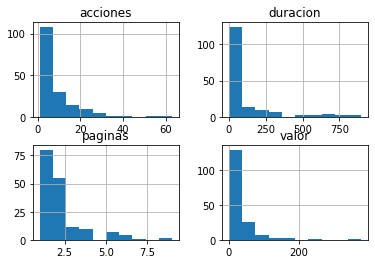

In [11]:
#pero antes vamos a procesar el conjunto de datos, vamos a hacer unas visualizaciones que nos pueden ayudar a comprender mejor la información con la que trabajamos y su correlación.
#visualizamos las cuatro Features de entrada con nombres,duración, páginas,acciones y valor podemos ver gráficamente entre qué valores sus mínimos y máximos y en qué concentran la mayor densidad de registros.
dataframe.drop(['clase'],1).hist()
plt.show()

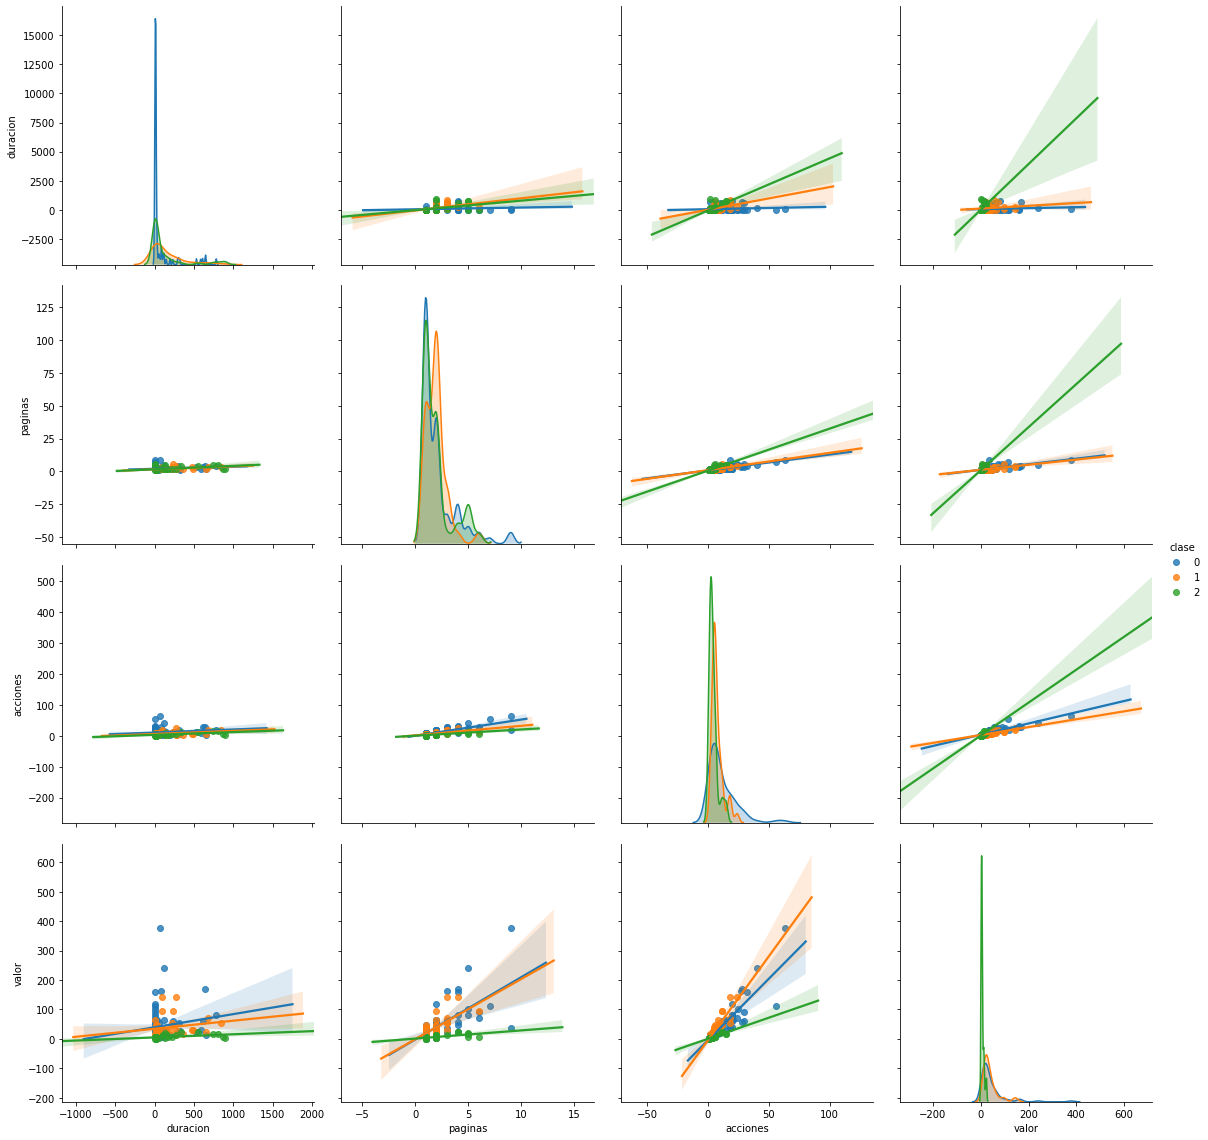

In [12]:
#Y también podemos interrelacionar las entradas, para ver como se concentran las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en verde y Linux en rojo.
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

In [13]:
#Ahora cargamos las variables de las 4 columnas de entrada en X excluyendo la columna clase. En cambio agregamos la columna clase en la variable y. Ejecutamos X.shape para comprobar la dimensión de datos de entrada de 170 registros por 4 columnas.
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [17]:
#Y creamos nuestro modelo y hacemos que se ajuste
predictions = model.predict(X)
(predictions)[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [18]:
#confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve la precisión media de las predicciones
model.score(X,y)

0.7764705882352941

In [32]:
#aqui validaremos el modelo
#Esto evitará problemas en los que nuestro algoritmo pueda fallar
#subdividimos nuestros datos de entrada en forma aleatoria utilizando 80% de registros para entrenamiento y 20% para validar.
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [22]:
#ahora hacemos las predicciones
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


In [23]:
#Reporte de Resultados del Modelo
#vemos en pantalla la «matriz de confusión» donde muestra cuantos resultados equivocados tuvo de cada clase (los que no están en la diagonal), por ejemplo predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows.

print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [24]:
#También podemos ver el reporte de clasificación con nuestro conjunto de Validación. En nuestro caso vemos que se utilizaron como soporte 18 registros windows, 6 de mac y 10 de Linux total de 34 registros. Podemos ver la precisión con que se acertaron cada una de las clases.
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [31]:
#Clasificación (o predicción) de nuevos valores
#vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

#Tiempo Duración: 10
#Paginas visitadas: 3
#Acciones al navegar: 5
#Valoración: 9
#Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2], dtype=int64)